# COVID-19 correlations- rough example notebook? 

The following is a code notebook which accompanies a research paper on this topic from MAXCOR labs. We will examine several topics:


In [3]:
# import libraries
# import makedalytics as ma
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime
from datetime import date
from pandas.tseries.offsets import DateOffset
# math libraries and packages
import math as mth
#import scipy
from scipy import stats
#fancy visualization and other fancy libraries and packages
import datetime as dt
from IPython.display import Markdown, display
##import plotly.express as px

<a id='section_id_1'></a>
## This notebook is made to give a rough idea about how to look at correlations between R, OSI and deaths
First we will read in and explore data from the Israeli Ministry of Health and Oxford.

## Oxford data

In [ ]:
import_ox = pd.read_csv('https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/OxCGRT_latest.csv')

In [ ]:
israeli_ox = import_ox[import_ox.CountryName == 'Israel']
israeli_ox['date_as_date']=pd.to_datetime(israeli_ox['Date'], format ='%Y%m%d')
israeli_ox= israeli_ox[['date_as_date', 'StringencyIndex']]
israeli_ox = israeli_ox[israeli_ox.date_as_date < dt.datetime(2021,7, 1)].copy(deep = True)

In [ ]:
israeli_ox

In [5]:
israeli_ox.to_csv('D:/MAXCORlabwork/covid/most_current_csvs/maxcor_covid_with_oxford_stringency_data4newvers.csv')

In [6]:
#israeli_ox = pd.read_csv('D:/MAXCORlabwork/covid/most_current_csvs/mmaxcor_covid_with_oxford_stringency_data4newvers.csv')

In [7]:
israeli_ox 

,date_as_date,StringencyIndex
95927,2020-01-01,0.00
95928,2020-01-02,0.00
95929,2020-01-03,0.00
95930,2020-01-04,0.00
95931,2020-01-05,0.00
...,...,...
96469,2021-06-26,29.63
96470,2021-06-27,29.63
96471,2021-06-28,29.63
96472,2021-06-29,29.63


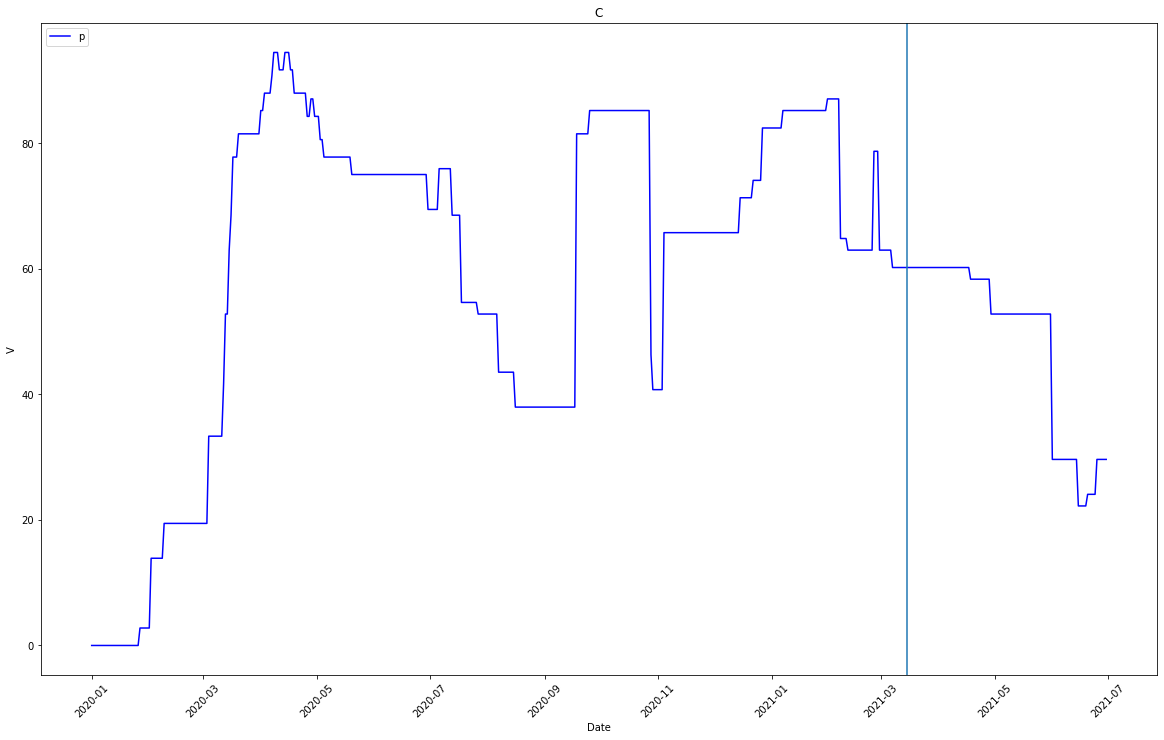

In [8]:
# show MOH daily deaths
fig, ax = plt.subplots(figsize=(20, 12))

#Add x-axis and y-axis
ax.plot(pd.to_datetime(israeli_ox.date_as_date, format='%Y-%m-%d'),
       israeli_ox.StringencyIndex,
       label='p',
       color='blue')



# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="V",
       title="C")

plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.axvline(dt.datetime(2021, 3, 15))
# plt.axvline(dt.datetime(2021, 5, 1))
# plt.axvline(dt.datetime(2021, 7, 1))

## So no, actually stringency was much lower than during the period efficacy was determined. We should have gotten even more deaths! Something else is saving us.

<a id='section_id_4'></a>
## What is really happening when we look at R?
We will start with the Israeli MOH data on R

In [9]:

R = pd.read_csv('D:/MAXCORlabwork/covid/R_for_israel_from_moh_R_for_israel_from_moh.csv')

In [10]:
R = R.rename(columns = {'date': 'date_as_date', 'R': 'r'})
R.tail(15)

,date_as_date,r
468,6/12/2021,2.08
469,6/13/2021,2.27
470,6/14/2021,2.45
471,6/15/2021,2.47
472,6/16/2021,2.29
473,6/17/2021,2.17
474,6/18/2021,1.92
475,6/19/2021,1.84
476,6/20/2021,1.75
477,6/21/2021,1.54


In [11]:
R['date_as_date']=pd.to_datetime(R['date_as_date'], format ='%m/%d/%Y')
R

,date_as_date,r
0,2020-03-01,2.64
1,2020-03-02,2.25
2,2020-03-03,2.39
3,2020-03-04,2.44
4,2020-03-05,2.36
...,...,...
478,2021-06-22,1.43
479,2021-06-23,1.41
480,2021-06-24,1.45
481,2021-06-25,1.43


# Let's look at a graph to get a visceral feeling of the correlation

In [12]:

# red_time = R[R.r >=1]
# red_time['colors'] = 'red'
# green_time = R[R.r <1] 
# green_time['colors'] = 'green'
# nr =red_time.merge (green_time, on = 'date_as_date')
# nr
near1 =[0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00,1.01,1.02,1.03,1.04,1.05,1.06, 1.07,1.08,1.09,]
R['colors'] = np.where(R['r']<1.0, 'green','red')
R['colors'] = np.where(R['r'].isin(near1), 'yellow', R['colors'])
R.tail(25)

,date_as_date,r,colors
458,2021-06-02,0.89,green
459,2021-06-03,0.89,green
460,2021-06-04,1.12,red
461,2021-06-05,1.07,yellow
462,2021-06-06,1.13,red
463,2021-06-07,1.18,red
464,2021-06-08,1.28,red
465,2021-06-09,1.54,red
466,2021-06-10,1.77,red
467,2021-06-11,2.02,red


In [13]:
# help(ax.scatter)
#R.r
M = R.r.to_numpy()
M

array([2.64, 2.25, 2.39, 2.44, 2.36, 2.63, 2.18, 2.26, 2.31, 2.28, 2.36,
       2.39, 2.32, 2.25, 2.13, 2.08, 1.96, 1.85, 1.74, 1.6 , 1.52, 1.46,
       1.38, 1.34, 1.25, 1.2 , 1.13, 0.99, 0.89, 0.8 , 0.77, 0.78, 0.82,
       0.86, 0.89, 0.91, 0.91, 0.91, 0.9 , 0.83, 0.81, 0.8 , 0.8 , 0.83,
       0.84, 0.81, 0.74, 0.69, 0.68, 0.64, 0.63, 0.61, 0.59, 0.57, 0.56,
       0.5 , 0.55, 0.54, 0.5 , 0.49, 0.54, 0.58, 0.61, 0.63, 0.6 , 0.58,
       0.56, 0.57, 0.62, 0.68, 0.64, 0.68, 0.77, 0.78, 0.81, 0.83, 1.1 ,
       1.26, 1.54, 1.84, 1.89, 2.02, 2.08, 1.93, 1.86, 1.7 , 1.46, 1.48,
       1.43, 1.42, 1.36, 1.44, 1.38, 1.34, 1.36, 1.28, 1.22, 1.26, 1.2 ,
       1.23, 1.26, 1.23, 1.22, 1.26, 1.27, 1.32, 1.34, 1.33, 1.38, 1.41,
       1.46, 1.44, 1.46, 1.49, 1.5 , 1.5 , 1.51, 1.44, 1.43, 1.36, 1.3 ,
       1.29, 1.28, 1.28, 1.28, 1.23, 1.23, 1.21, 1.18, 1.17, 1.12, 1.1 ,
       1.11, 1.09, 1.07, 1.08, 1.04, 1.03, 1.04, 1.04, 1.02, 1.  , 0.96,
       0.93, 0.91, 0.91, 0.9 , 0.9 , 0.92, 0.97, 0.

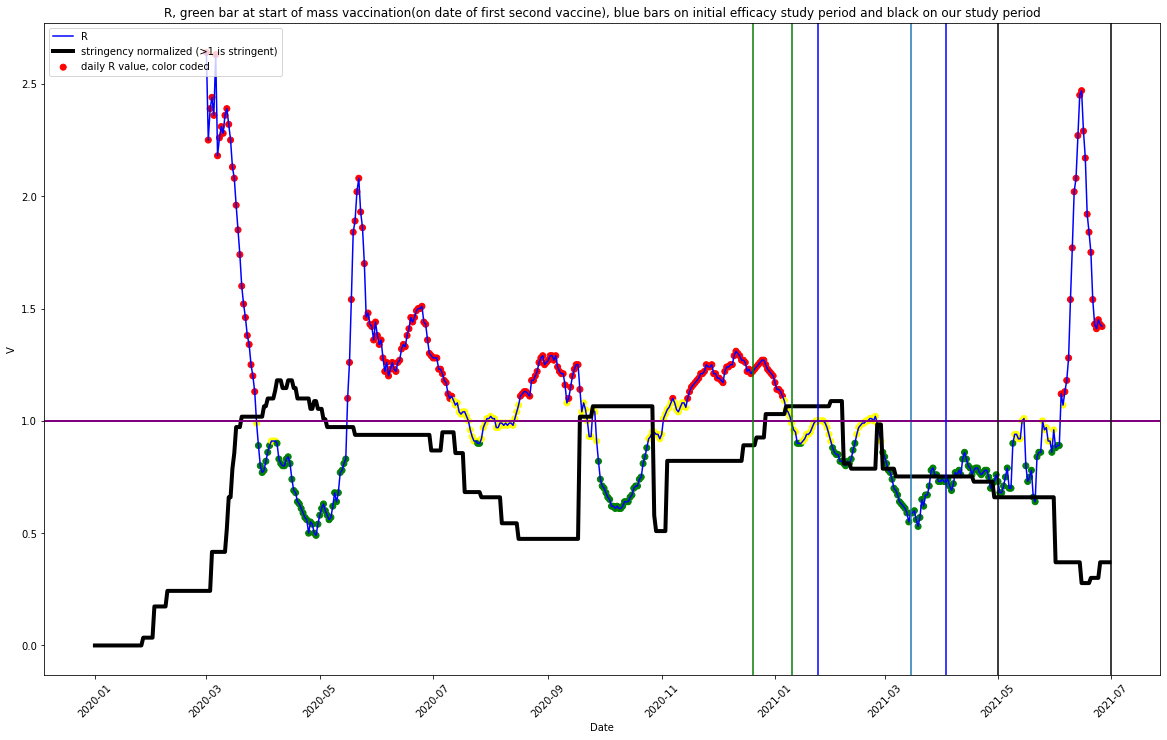

In [15]:
# from matplotlib.collections import LineCollection
# rc('axes', linewidth=4)
# # show MOH daily deaths
fig, ax = plt.subplots(figsize=(20, 12))

#Add x-axis and y-axis
ax.scatter(
    x=R.date_as_date,
    y=R.r,
    label='daily R value, color coded',
    #color=R['colors'],
    c=R.colors,    
    cmap='gray',
)
ax.plot(
    R.date_as_date,
    R.r,
    label='R',
    color='blue',
)
       #c= R.colors,    
       #cmap = 'gray')

ax.plot(
    pd.to_datetime(israeli_ox.date_as_date, format='%Y-%m-%d'),
    israeli_ox.StringencyIndex / 80,
    label='stringency normalized (>1 is stringent)',
    color='black',
    linewidth=4,
)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="V",
       title="C")

plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.title('R, green bar at start of mass vaccination(on date of first second vaccine), blue bars on initial efficacy study period and black on our study period')
plt.axvline(dt.datetime(2021, 3, 15))
plt.axhline(1., color = 'purple', linewidth=2);
plt.axvline(dt.datetime(2020, 12, 20), color = 'green')
plt.axvline(dt.datetime(2021, 1, 10), color = 'green')
plt.axvline(dt.datetime(2021, 1, 24), color = 'blue')
plt.axvline(dt.datetime(2021, 4, 3), color = 'blue')
plt.axvline(dt.datetime(2021, 5, 1), color = 'black')
plt.axvline(dt.datetime(2021, 7, 1), color = 'black');

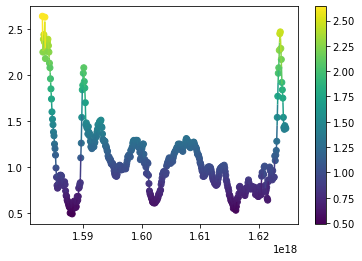

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd


def colored_line(x, y, c):
    N = 501
    
    xx = np.linspace(x.min(), x.max(), N)
    yy = np.interp(xx, x, y)
    cc = np.interp(xx, x, c)
    
    ax = plt.gca()
    
    points = np.array([xx, yy]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(yy.min(), yy.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    lc.set_array(cc)
    line = ax.add_collection(lc)
    
    dots = ax.scatter(x, y, c=y)
    return line, dots


# x = np.linspace(1, 10, 15)
# y = np.sin(x)
x = pd.to_datetime(R.date_as_date, format='%Y-%m-%d').view(np.int64)
y = R.r
line, _ = colored_line(x, y, y)
plt.colorbar(line)

In [17]:
x_timestamps = pd.to_datetime(israeli_ox.date_as_date, format='%Y-%m-%d')
x_timestamps.view(np.int64).dtype

dtype('int64')

In [18]:
israeli_ox['StringencyIndex'].dtype

dtype('float64')

In [19]:
israeli_ox

,date_as_date,StringencyIndex
95927,2020-01-01,0.00
95928,2020-01-02,0.00
95929,2020-01-03,0.00
95930,2020-01-04,0.00
95931,2020-01-05,0.00
...,...,...
96469,2021-06-26,29.63
96470,2021-06-27,29.63
96471,2021-06-28,29.63
96472,2021-06-29,29.63


In [20]:
R

,date_as_date,r,colors
0,2020-03-01,2.64,red
1,2020-03-02,2.25,red
2,2020-03-03,2.39,red
3,2020-03-04,2.44,red
4,2020-03-05,2.36,red
...,...,...,...
478,2021-06-22,1.43,red
479,2021-06-23,1.41,red
480,2021-06-24,1.45,red
481,2021-06-25,1.43,red


In [21]:
# grouped = R.groupby('colors')
# fig, ax = plt.subplots(1)

# for key, group in grouped:
#    group.plot(ax=ax, x="date_as_date", y="r", label=key, color=key)

In [22]:
# so we need to do some kind of correlation number to show that
# we could use weekly time point differences for psuedo-derivative..
# but let's try a time series Pearson's or Spearman's correlation
israeli_ox.date_as_date = pd.to_datetime(israeli_ox.date_as_date, format='%Y-%m-%d')
for_corr= israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')
for_corr.drop(['date_as_date','colors'], axis = 1)

,StringencyIndex,r
date_as_date,,
2020-03-01,19.44,2.64
2020-03-02,19.44,2.25
2020-03-03,19.44,2.39
2020-03-04,33.33,2.44
2020-03-05,33.33,2.36
...,...,...
2021-06-22,24.07,1.43
2021-06-23,24.07,1.41
2021-06-24,24.07,1.45


In [23]:
total_pearson_r = for_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series: {total_pearson_r}")
total_spearman_r = for_corr.corr(method ='spearman').iloc[0,1]
print(f"Pandas computed Spearman r for entire time series: {total_spearman_r}")

Pandas computed Pearson r for entire time series: -0.3895716825710089
Pandas computed Spearman r for entire time series: -0.26033778012288117


In [24]:
total_pearson_r = for_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series: {total_pearson_r}")
total_spearman_r = for_corr.corr(method ='spearman').iloc[0,1]
print(f"Pandas computed Spearman r for entire time series: {total_spearman_r}")

Pandas computed Pearson r for entire time series: -0.3895716825710089
Pandas computed Spearman r for entire time series: -0.26033778012288117


In [25]:
# So basically, overall there was not such a big correlation- which makes sense becuase it the correlation flipped when we vaxed
#let' try before vaccines
corr_before_vaccines = for_corr[for_corr.date_as_date < '2021-01-01' ]
prevax_pearson_r = corr_before_vaccines.corr(method ='pearson').iloc[0,1]
prevax_spearman_r = corr_before_vaccines.corr(method ='spearman').iloc[0,1]
print(f"Pandas computed Pearson r for time series before vaccination: {prevax_pearson_r}")
print(f"Pandas computed Spearman r for time series before vaccination: {prevax_spearman_r}")

Pandas computed Pearson r for time series before vaccination: -0.45368017154870405
Pandas computed Spearman r for time series before vaccination: -0.47806900802272273


In [26]:
# So we saw a moderate inverse correlation before vaccines. The higher the stringency, the lower the R
# we would assume we could get higher with a time lag cross correlation

# but let's check after vaccination
corr_after_vaccines = for_corr[for_corr.date_as_date > '2021-01-10' ]
postvax_pearson_r = corr_after_vaccines.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for time series after vaccination: {postvax_pearson_r}")

Pandas computed Pearson r for time series after vaccination: -0.5507141858397315


##  Oh, yeah the delta variant came along, and shot R up...well Ronen will have to decide where to cut. Let's just look until June:

In [27]:
corr_interem_vaccines = corr_after_vaccines[corr_after_vaccines.date_as_date < '2021-06-01' ]
interem_pearson_r = corr_interem_vaccines.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for time series after vaccination but before June: {interem_pearson_r}")

Pandas computed Pearson r for time series after vaccination but before June: 0.4312604345718848


In [28]:
# So the obvious uestion is what happens if we time shift
time_shift_minus3_corr = for_corr
#time_shift_corr = time_shift_corr.rename(columns = {'date_1s_date':'old_date'})
time_shift_minus3_corr.r = time_shift_minus3_corr.r.shift(-3)
time_shift_minus3_corr

,date_as_date,StringencyIndex,r,colors
date_as_date,,,,
2020-03-01,2020-03-01,19.44,2.44,red
2020-03-02,2020-03-02,19.44,2.36,red
2020-03-03,2020-03-03,19.44,2.63,red
2020-03-04,2020-03-04,33.33,2.18,red
2020-03-05,2020-03-05,33.33,2.26,red
...,...,...,...,...
2021-06-22,2021-06-22,24.07,1.43,red
2021-06-23,2021-06-23,24.07,1.42,red
2021-06-24,2021-06-24,24.07,NaN,red


In [29]:
for_corr= israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')
for_corr.drop(['date_as_date','colors'], axis = 1)
# So the obvious uestion is what happens if we time shift
time_shift_minus4_corr = for_corr
#time_shift_corr = time_shift_corr.rename(columns = {'date_1s_date':'old_date'})
time_shift_minus4_corr.r = time_shift_minus4_corr.r.shift(-4)
#time_shift_minus4_corr
for_corr.to_csv('for_corr.csv')

In [30]:
for_corr= israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')
for_corr.drop(['date_as_date','colors'], axis = 1)
# So the obvious uestion is what happens if we time shift
time_shift_minus5_corr = for_corr
#time_shift_corr = time_shift_corr.rename(columns = {'date_1s_date':'old_date'})
time_shift_minus5_corr.r = time_shift_minus5_corr.r.shift(-5)
for_corr= israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')
for_corr.drop(['date_as_date','colors'], axis = 1)
time_shift_minus6_corr = for_corr
#time_shift_corr = time_shift_corr.rename(columns = {'date_1s_date':'old_date'})
time_shift_minus6_corr.r = time_shift_minus6_corr.r.shift(-6)
for_corr= israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')
for_corr.drop(['date_as_date','colors'], axis = 1)
time_shift_minus7_corr = for_corr
#time_shift_corr = time_shift_corr.rename(columns = {'date_1s_date':'old_date'})
time_shift_minus7_corr.r = time_shift_minus7_corr.r.shift(-7)
time_shift_minus6_corr.tail(10)


,date_as_date,StringencyIndex,r,colors
date_as_date,,,,
2021-06-17,2021-06-17,22.22,1.41,red
2021-06-18,2021-06-18,22.22,1.45,red
2021-06-19,2021-06-19,22.22,1.43,red
2021-06-20,2021-06-20,24.07,1.42,red
2021-06-21,2021-06-21,24.07,NaN,red
2021-06-22,2021-06-22,24.07,NaN,red
2021-06-23,2021-06-23,24.07,NaN,red
2021-06-24,2021-06-24,24.07,NaN,red
2021-06-25,2021-06-25,29.63,NaN,red


In [31]:
time_shift_total_pearson_m3_r = time_shift_minus3_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series with shift 3: {time_shift_total_pearson_m3_r }")
time_shift_total_pearson_m4_r = time_shift_minus4_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series with sift 4: {time_shift_total_pearson_m4_r }")

Pandas computed Pearson r for entire time series with shift 3: -0.4337522352286377
Pandas computed Pearson r for entire time series with sift 4: -0.4441578017052499


In [32]:
time_shift_total_pearson_m5_r = time_shift_minus5_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series with shift 5: {time_shift_total_pearson_m5_r }")
time_shift_total_pearson_m6_r = time_shift_minus6_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series with shift 6: {time_shift_total_pearson_m6_r }")
time_shift_total_pearson_m7_r = time_shift_minus7_corr.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for entire time series with shift 7: {time_shift_total_pearson_m7_r }")

Pandas computed Pearson r for entire time series with shift 5: -0.45348571481309297
Pandas computed Pearson r for entire time series with shift 6: -0.45797318508847273
Pandas computed Pearson r for entire time series with shift 7: -0.46315200983175986


In [33]:
# still overall we don't see the pattern thanks to vaccination and delta variants, but let's look pre-vax
ts_corr_before_vaccines3 = time_shift_minus3_corr[time_shift_minus3_corr.date_as_date < '2021-01-10' ]
ts_prevax_pearson_r3 = ts_corr_before_vaccines3.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for time series with 3 day shift before vaccination: {ts_prevax_pearson_r3}")
ts_corr_before_vaccines4 = time_shift_minus4_corr[time_shift_minus4_corr.date_as_date < '2021-01-10' ]
ts_prevax_pearson_r4 = ts_corr_before_vaccines4.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for time series with 4 day shift before vaccination: {ts_prevax_pearson_r4}")
ts_corr_before_vaccines5 = time_shift_minus5_corr[time_shift_minus5_corr.date_as_date < '2021-01-10' ]
ts_prevax_pearson_r5 = ts_corr_before_vaccines5.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for time series with 5 day shift before vaccination: {ts_prevax_pearson_r5}")

ts_corr_before_vaccines6 = time_shift_minus6_corr[time_shift_minus6_corr.date_as_date < '2021-01-10' ]
ts_prevax_pearson_r6 = ts_corr_before_vaccines6.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for time series with 6 day shift before vaccination: {ts_prevax_pearson_r6}")
ts_corr_before_vaccines7 = time_shift_minus7_corr[time_shift_minus7_corr.date_as_date < '2021-01-10' ]
ts_prevax_pearson_r7 = ts_corr_before_vaccines7.corr(method ='pearson').iloc[0,1]
print(f"Pandas computed Pearson r for time series with 7 day shift before vaccination: {ts_prevax_pearson_r7}")

Pandas computed Pearson r for time series with 3 day shift before vaccination: -0.49738716410098627
Pandas computed Pearson r for time series with 4 day shift before vaccination: -0.5077218637189079
Pandas computed Pearson r for time series with 5 day shift before vaccination: -0.5158059287768263
Pandas computed Pearson r for time series with 6 day shift before vaccination: -0.5174183180069161
Pandas computed Pearson r for time series with 7 day shift before vaccination: -0.5201544726619863


In [34]:
ts_corr_before_vaccines

NameError: name 'ts_corr_before_vaccines' is not defined

In [35]:

for_corr = israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')

for i in range(-14, 7):
#     for_corr.drop(['date_as_date','colors'], axis = 1)
# So the obvious uestion is what happens if we time shift
    #time_shift_minus4_corr = for_corr
    for_corr_copy = for_corr.copy()
    for_corr_copy['r'] = for_corr['r'].shift(i)
    end = pd.to_datetime('2021-01-10', format='%Y-%m-%d')
    ts_corr_before_vaccines = for_corr_copy[for_corr_copy['date_as_date'] < end]
    ts_prevax_pearson_r = ts_corr_before_vaccines['r'].corr(
        method='pearson',
        other=ts_corr_before_vaccines['StringencyIndex'],
    )
#     ts_prevax_spearman_r = ts_corr_before_vaccines['r'].corr(
#         method ='spearman',
#         other=ts_corr_before_vaccines['StringencyIndex'],
#     )
    print('''
        Pandas computed Pearson r for time series with,
        i = {} day shift before vaccination:
        ts_prevax_pearson_r = {}
    '''.format(i, ts_prevax_pearson_r)
    )
#     print('''
#         Pandas computed Spearman r for time series with,
#         i = {} day shift before vaccination:
#         ts_prevax_spearman_r = {}
#     '''.format(i, ts_prevax_spearman_r)
#     )
    #print


        Pandas computed Pearson r for time series with,
        i = -14 day shift before vaccination:
        ts_prevax_pearson_r = -0.435089352836222
    

        Pandas computed Pearson r for time series with,
        i = -13 day shift before vaccination:
        ts_prevax_pearson_r = -0.4621374395285325
    

        Pandas computed Pearson r for time series with,
        i = -12 day shift before vaccination:
        ts_prevax_pearson_r = -0.48421531076026497
    

        Pandas computed Pearson r for time series with,
        i = -11 day shift before vaccination:
        ts_prevax_pearson_r = -0.5030439690365807
    

        Pandas computed Pearson r for time series with,
        i = -10 day shift before vaccination:
        ts_prevax_pearson_r = -0.516054975341378
    

        Pandas computed Pearson r for time series with,
        i = -9 day shift before vaccination:
        ts_prevax_pearson_r = -0.5224418083554009
    

        Pandas computed Pearson r for time series wit

In [36]:
# let's check spearman
for_corr = israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')

for i in range(-14, 7):
#     for_corr.drop(['date_as_date','colors'], axis = 1)
# So the obvious uestion is what happens if we time shift
    #time_shift_minus4_corr = for_corr
    for_corr_copy = for_corr.copy()
    for_corr_copy['r'] = for_corr['r'].shift(i)
    end = pd.to_datetime('2021-01-10', format='%Y-%m-%d')
    ts_corr_before_vaccines = for_corr_copy[for_corr_copy['date_as_date'] < end]
#     ts_prevax_pearson_r = ts_corr_before_vaccines['r'].corr(
#         method='pearson',
#         other=ts_corr_before_vaccines['StringencyIndex'],
#     )
    ts_prevax_spearman_r = ts_corr_before_vaccines.corr(
        method ='spearman',
        #other=ts_corr_before_vaccines['StringencyIndex'],
    )
#     print('''
#         Pandas computed Pearson r for time series with,
#         i = {} day shift before vaccination:
#         ts_prevax_pearson_r = {}
#     '''.format(i, ts_prevax_pearson_r)
#     )
    print('''
        Pandas computed Spearman r for time series with,
        i = {} day shift before vaccination:
        ts_prevax_spearman_r = {}
    '''.format(i, ts_prevax_spearman_r)
    )
    #print


        Pandas computed Spearman r for time series with,
        i = -14 day shift before vaccination:
        ts_prevax_spearman_r =                  StringencyIndex         r
StringencyIndex         1.000000 -0.532912
r                      -0.532912  1.000000
    

        Pandas computed Spearman r for time series with,
        i = -13 day shift before vaccination:
        ts_prevax_spearman_r =                  StringencyIndex         r
StringencyIndex         1.000000 -0.552995
r                      -0.552995  1.000000
    

        Pandas computed Spearman r for time series with,
        i = -12 day shift before vaccination:
        ts_prevax_spearman_r =                  StringencyIndex         r
StringencyIndex         1.000000 -0.568382
r                      -0.568382  1.000000
    

        Pandas computed Spearman r for time series with,
        i = -11 day shift before vaccination:
        ts_prevax_spearman_r =                  StringencyIndex         r
StringencyIndex

In [37]:
total_spearman_r_prevax = ts_corr_before_vaccines.corr(method ='spearman').iloc[0,1]
print(f"Pandas computed Spearman r for  time series before vax: {total_spearman_r_prevax}")

Pandas computed Spearman r for  time series before vax: -0.3116302660888373


In [38]:
for_corr = israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')
for_corr

,date_as_date,StringencyIndex,r,colors
date_as_date,,,,
2020-03-01,2020-03-01,19.44,2.64,red
2020-03-02,2020-03-02,19.44,2.25,red
2020-03-03,2020-03-03,19.44,2.39,red
2020-03-04,2020-03-04,33.33,2.44,red
2020-03-05,2020-03-05,33.33,2.36,red
...,...,...,...,...
2021-06-22,2021-06-22,24.07,1.43,red
2021-06-23,2021-06-23,24.07,1.41,red
2021-06-24,2021-06-24,24.07,1.45,red


In [39]:
moh = pd.read_csv('D:/MAXCORlabwork/covid/most_current_csvs/covid19-data-israel-30062021.csv')
moh = moh.rename(columns={'תאריך':'date','מספר נפטרים מצטבר':'cumu_deaths'})
moh.cumu_deaths = moh.cumu_deaths.str.replace(',', '')
moh.cumu_deaths = pd.to_numeric(moh.cumu_deaths)
moh['daily_deaths'] = moh.cumu_deaths - moh.cumu_deaths.shift()
moh['date_as_date'] = pd.to_datetime(moh.date)
moh.index = pd.to_datetime(moh['date_as_date'], format='%Y-%m-%d')#print(type(moh.date_as_date[3]))
moh = moh.rename(columns = {'date_as_date':'col_date'})
for_corr = for_corr.rename(columns = {'date_as_date':'col_date'})
for_corr_deaths = for_corr.merge(moh, on='date_as_date' )
for_corr_deaths= for_corr_deaths.rename(columns = {'מספר חולים מונשמים':'intubated'})#['date_as_date'] = for_corr_deaths['col_date']

In [40]:
for i in range(-7, 17):
#     for_corr.drop(['date_as_date','colors'], axis = 1)
# So the obvious uestion is what happens if we time shift
    #time_shift_minus4_corr = for_corr
    for_corr_deaths_copy = for_corr_deaths.copy()
    for_corr_deaths_copy['intubated'] = for_corr_deaths['intubated'].shift(i)
    end = pd.to_datetime('2021-01-10', format='%Y-%m-%d')
    ts_corr_deaths_before_vaccines = for_corr_deaths_copy[for_corr_deaths_copy['col_date_x'] < end]
    ts_prevax_deaths_pearson_r = ts_corr_deaths_before_vaccines['intubated'].corr(
        method='pearson',
        other=ts_corr_deaths_before_vaccines['daily_deaths'],
    )
    print('''
        Pandas computed Pearson r for time series r versus deaths with,
        i = {} day shift (before vaccination):
        ts_prevax_pearson_r = {}
    '''.format(i, ts_prevax_deaths_pearson_r)
    )
    #print


        Pandas computed Pearson r for time series r versus deaths with,
        i = -7 day shift (before vaccination):
        ts_prevax_pearson_r = 0.2830513857809526
    

        Pandas computed Pearson r for time series r versus deaths with,
        i = -6 day shift (before vaccination):
        ts_prevax_pearson_r = 0.31817489368074936
    

        Pandas computed Pearson r for time series r versus deaths with,
        i = -5 day shift (before vaccination):
        ts_prevax_pearson_r = 0.3471296541695833
    

        Pandas computed Pearson r for time series r versus deaths with,
        i = -4 day shift (before vaccination):
        ts_prevax_pearson_r = 0.37309611364770096
    

        Pandas computed Pearson r for time series r versus deaths with,
        i = -3 day shift (before vaccination):
        ts_prevax_pearson_r = 0.43251398101479116
    

        Pandas computed Pearson r for time series r versus deaths with,
        i = -2 day shift (before vaccination):
       

In [41]:
for_corr = israeli_ox.merge(R, on='date_as_date')
for_corr.index = pd.to_datetime(for_corr['date_as_date'], format='%Y-%m-%d')
for_corr = for_corr.rename(columns = {'date_as_date':'col_date'})
for_corr_deaths = for_corr.merge(moh, on='date_as_date' )
for_corr_deaths= for_corr_deaths.rename(columns = {'מספר חולים מונשמים':'intubated'})#['date_as_date'] = for_corr_deaths['col_date']

for_corr_deaths_copy = for_corr_deaths_copy.rename(columns={'מספר חולים מצטבר':'total_patients'}) 
for_corr_deaths_copy.total_patients = for_corr_deaths_copy.total_patients.str.replace(',', '')
for_corr_deaths_copy.total_patients = pd.to_numeric(for_corr_deaths_copy.total_patients)
for_corr_deaths_copy['new_patients'] = for_corr_deaths_copy.total_patients - for_corr_deaths_copy.total_patients.shift()

In [42]:
for_corr_deaths_copy

,col_date_x,StringencyIndex,r,colors,date,מספר בדיקות מצטבר,מספר חולים מאושפזים,intubated,total_patients,מספר חולים קשה,cumu_deaths,daily_deaths,col_date_y,new_patients
date_as_date,,,,,,,,,,,,,,
2020-03-02,2020-03-02,19.44,2.25,red,03/02/2020 00:00:00,161,0,NaN,7,0,0,0.0,2020-03-02,NaN
2020-03-03,2020-03-03,19.44,2.39,red,03/03/2020 00:00:00,"1,989",10,NaN,22,0,0,0.0,2020-03-03,15.0
2020-03-04,2020-03-04,33.33,2.44,red,03/04/2020 00:00:00,"106,950",816,NaN,7756,131,43,5.0,2020-03-04,7734.0
2020-03-05,2020-03-05,33.33,2.36,red,03/05/2020 00:00:00,"405,372",327,NaN,16130,101,236,3.0,2020-03-05,8374.0
2020-03-06,2020-03-06,33.33,2.63,red,03/06/2020 00:00:00,"607,822",122,NaN,17435,28,295,1.0,2020-03-06,1305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,2021-06-22,24.07,1.43,red,22/06/2021 00:00:00,"17,476,675",56,32.0,840119,26,6428,0.0,2021-06-22,111.0
2021-06-23,2021-06-23,24.07,1.41,red,23/06/2021 00:00:00,"17,520,048",58,218.0,840259,25,6429,1.0,2021-06-23,140.0
2021-06-24,2021-06-24,24.07,1.45,red,24/06/2021 00:00:00,"17,561,483",55,319.0,840488,23,6429,0.0,2021-06-24,229.0


In [43]:
for_corr_deaths_copy['מספר חולים קשה'] = for_corr_deaths_copy['מספר חולים קשה'].str.replace(',', '')
for_corr_deaths_copy['מספר חולים קשה'] = pd.to_numeric(for_corr_deaths_copy['מספר חולים קשה'])
for i in range(-7, 14):
#     for_corr.drop(['date_as_date','colors'], axis = 1)
# So the obvious uestion is what happens if we time shift
    #time_shift_minus4_corr = for_corr
    #for_corr_deaths_copy = for_corr_deaths.copy()
    for_corr_deaths_copy['מספר חולים קשה'] = for_corr_deaths_copy['מספר חולים קשה'].shift(i)
    end = pd.to_datetime('2021-06-10', format='%Y-%m-%d')
    ts_corr_deaths = for_corr_deaths_copy[for_corr_deaths_copy['col_date_x'] < end]
    ts_deaths_pearson_r = ts_corr_deaths['מספר חולים קשה'].corr(
        method='pearson',
        other=ts_corr_deaths_before_vaccines['daily_deaths'],
    )
    print('''
        Pandas computed Pearson r for time series severely ill versus deaths with,
        i = {} day shift :
        ts_prevax_pearson_r = {}
    '''.format(i, ts_deaths_pearson_r)
    )
    #print


        Pandas computed Pearson r for time series severely ill versus deaths with,
        i = -7 day shift :
        ts_prevax_pearson_r = 0.25403587989071796
    

        Pandas computed Pearson r for time series severely ill versus deaths with,
        i = -6 day shift :
        ts_prevax_pearson_r = 0.28433743793895877
    

        Pandas computed Pearson r for time series severely ill versus deaths with,
        i = -5 day shift :
        ts_prevax_pearson_r = 0.27240884062445886
    

        Pandas computed Pearson r for time series severely ill versus deaths with,
        i = -4 day shift :
        ts_prevax_pearson_r = 0.24729093766973434
    

        Pandas computed Pearson r for time series severely ill versus deaths with,
        i = -3 day shift :
        ts_prevax_pearson_r = 0.28512711974492416
    

        Pandas computed Pearson r for time series severely ill versus deaths with,
        i = -2 day shift :
        ts_prevax_pearson_r = 0.2955672338003131
    

    

In [44]:
for_deriv = pd.read_csv('for_corr.csv')
# for_deriv['si_diff'] = for_deriv.StringencyIndex/for_deriv.StringencyIndex.shift()
# for_deriv['r_diff'] = for_deriv.r/for_deriv.r.shift()


In [45]:
#fig, ax = plt.subplots(figsize=(20, 12))

#Add x-axis and y-axis
# ax.plot(for_deriv.date_as_date,
#        for_deriv['re_log'],
#        label='daily R diff log, color coded',
#        #color=R['colors'],
#        color='green',)
# ax.plot(for_deriv.date_as_date,
#        for_deriv.r,
#        label='r',
#        color='blue',)
       #c= R.colors,    
       #cmap = 'gray')


## So from January to June, government stringency and R were moderatly positively correlated - because reverse causality. Or beccause the the government reacted when R went up, but then also influenced R. After vaccinations,something else caused R to go down, and they let up on the stringency with little effect. The something else was probably vaccines, plus or minus better contact tracing and isolation? And by the way, what about R and deaths?

In [46]:
death_data = pd.read_csv('D:/MAXCORlabwork/covid/most_current_csvs/maxcor_covid_w_oxf_stringency_data_simple.csv')
#death_data = death_data.rename(columns={'date':'date_as_date'})
death_data['date_as_date'] = pd.to_datetime(death_data['date'],format='%d/%m/%Y %H:%M:%S')

In [47]:
merge_deaths = for_corr.drop('colors', axis = 1)
merge_deaths#= merge_deaths.rename(columns =)

,col_date,StringencyIndex,r
date_as_date,,,
2020-03-01,2020-03-01,19.44,2.64
2020-03-02,2020-03-02,19.44,2.25
2020-03-03,2020-03-03,19.44,2.39
2020-03-04,2020-03-04,33.33,2.44
2020-03-05,2020-03-05,33.33,2.36
...,...,...,...
2021-06-22,2021-06-22,24.07,1.43
2021-06-23,2021-06-23,24.07,1.41
2021-06-24,2021-06-24,24.07,1.45


In [ ]:
death_data

In [ ]:
# let's show our lowest ever R since last year:
R.r.min()

In [ ]:
recentR= R[R.date_as_date > '01-01-2021']

In [ ]:
# how about the minimum R tis year?
recentR.r.min()

In [ ]:
# we could look at the correlation between stringency and R before and after vaccination?